In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

In [23]:
df=pd.read_csv("RTA.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [25]:
ndf=df[["Age_band_of_driver","Sex_of_driver","Educational_level","Driving_experience","Defect_of_vehicle","Area_accident_occured",
        "Types_of_Junction","Number_of_casualties","Sex_of_casualty","Cause_of_accident","Accident_severity"]]
ndf

,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Defect_of_vehicle,Area_accident_occured,Types_of_Junction,Number_of_casualties,Sex_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,1-2yr,No defect,Residential areas,No junction,2,na,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Above 10yr,No defect,Office areas,No junction,2,na,Overtaking,Slight Injury
2,18-30,Male,Junior high school,1-2yr,No defect,Recreational areas,No junction,2,Male,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,5-10yr,No defect,Office areas,Y Shape,2,Female,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,2-5yr,No defect,Industrial areas,Y Shape,2,na,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,2-5yr,No defect,Outside rural areas,No junction,1,na,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,5-10yr,No defect,Outside rural areas,No junction,1,na,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,5-10yr,No defect,Outside rural areas,No junction,1,Male,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Above 10yr,No defect,Office areas,No junction,1,na,Driving under the influence of drugs,Slight Injury


In [26]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age_band_of_driver     12316 non-null  object
 1   Sex_of_driver          12316 non-null  object
 2   Educational_level      11575 non-null  object
 3   Driving_experience     11487 non-null  object
 4   Defect_of_vehicle      7889 non-null   object
 5   Area_accident_occured  12077 non-null  object
 6   Types_of_Junction      11429 non-null  object
 7   Number_of_casualties   12316 non-null  int64 
 8   Sex_of_casualty        12316 non-null  object
 9   Cause_of_accident      12316 non-null  object
 10  Accident_severity      12316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


In [27]:
ndf.isna().sum()

Age_band_of_driver          0
Sex_of_driver               0
Educational_level         741
Driving_experience        829
Defect_of_vehicle        4427
Area_accident_occured     239
Types_of_Junction         887
Number_of_casualties        0
Sex_of_casualty             0
Cause_of_accident           0
Accident_severity           0
dtype: int64

In [40]:
fill_deu=ndf["Educational_level"].mode()[0]
ndf["Educational_level"].fillna(fill_deu,inplace=True)

fill_d_exp=ndf["Driving_experience"].mode()[0]
ndf["Driving_experience"].fillna(fill_d_exp,inplace=True)

fill_defect=ndf["Defect_of_vehicle"].mode()[0]
ndf["Defect_of_vehicle"].fillna(fill_defect,inplace=True)

fill_area=ndf["Area_accident_occured"].mode()[0]
ndf["Area_accident_occured"].fillna(fill_area,inplace=True)

fill_junction=ndf["Types_of_Junction"].mode()[0]
ndf["Types_of_Junction"].fillna(fill_junction,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7412\873614716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["Educational_level"].fillna(fill_deu,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7412\873614716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["Driving_experience"].fillna(fill_d_exp,inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7412\873614716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [41]:
ndf.isna().sum()

Age_band_of_driver       0
Sex_of_driver            0
Educational_level        0
Driving_experience       0
Defect_of_vehicle        0
Area_accident_occured    0
Types_of_Junction        0
Number_of_casualties     0
Sex_of_casualty          0
Cause_of_accident        0
Accident_severity        0
dtype: int64

In [56]:
ndf.duplicated().sum()

np.int64(0)

In [55]:
ndf.drop_duplicates(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7412\2877394319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop_duplicates(inplace=True)


In [57]:
ndf

,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Defect_of_vehicle,Area_accident_occured,Types_of_Junction,Number_of_casualties,Sex_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,1-2yr,No defect,Residential areas,No junction,2,na,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Above 10yr,No defect,Office areas,No junction,2,na,Overtaking,Slight Injury
2,18-30,Male,Junior high school,1-2yr,No defect,Recreational areas,No junction,2,Male,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,5-10yr,No defect,Office areas,Y Shape,2,Female,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,2-5yr,No defect,Industrial areas,Y Shape,2,na,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Junior high school,2-5yr,No defect,Outside rural areas,No junction,1,na,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,5-10yr,No defect,Outside rural areas,No junction,1,na,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,5-10yr,No defect,Outside rural areas,No junction,1,Male,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Above 10yr,No defect,Office areas,No junction,1,na,Driving under the influence of drugs,Slight Injury


### EDA

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7412\1038590208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Set2")


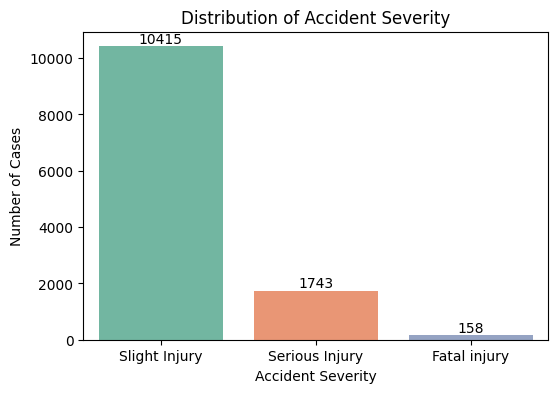

In [63]:
#What is the distribution of accident severity (Slight, Serious, Fatal)?
severity_counts = df["Accident_severity"].value_counts()
severity_percent = df["Accident_severity"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Set2")
plt.title("Distribution of Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Cases")
for i, v in enumerate(severity_counts.values):
    plt.text(i, v + 100, str(v), ha='center')
plt.show()


In [64]:
severity_counts

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

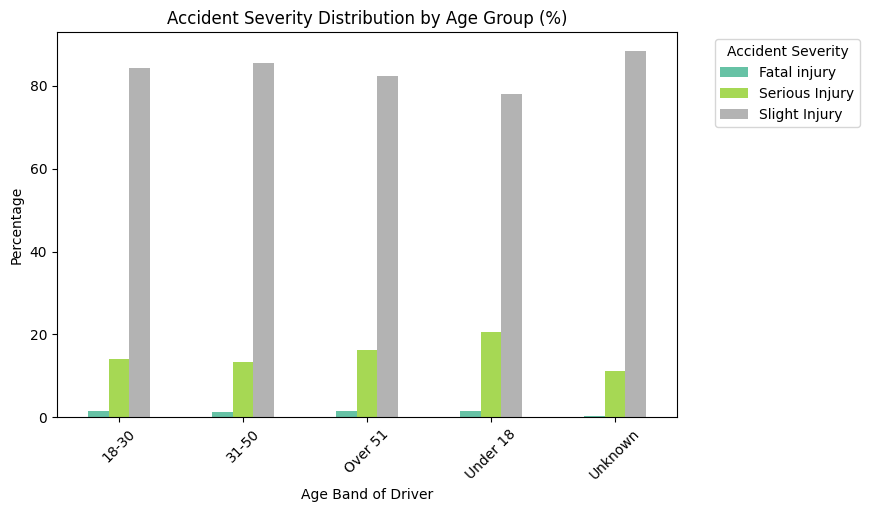

In [69]:
#Does age of the driver affect the severity of accidents?

# Crosstab of Accident Severity by Age
age_severity = pd.crosstab(df["Age_band_of_driver"], df["Accident_severity"], normalize="index") * 100

# Plot stacked bar chart
age_severity.plot(kind="bar", figsize=(8,5), colormap="Set2")

plt.title("Accident Severity Distribution by Age Group (%)")
plt.xlabel("Age Band of Driver")
plt.ylabel("Percentage")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [70]:
age_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Age_band_of_driver,,,
18-30,1.451651,14.141887,84.406462
31-50,1.321263,13.237093,85.441644
Over 51,1.514196,16.214511,82.271293
Under 18,1.454545,20.484848,78.060606
Unknown,0.387597,11.111111,88.501292


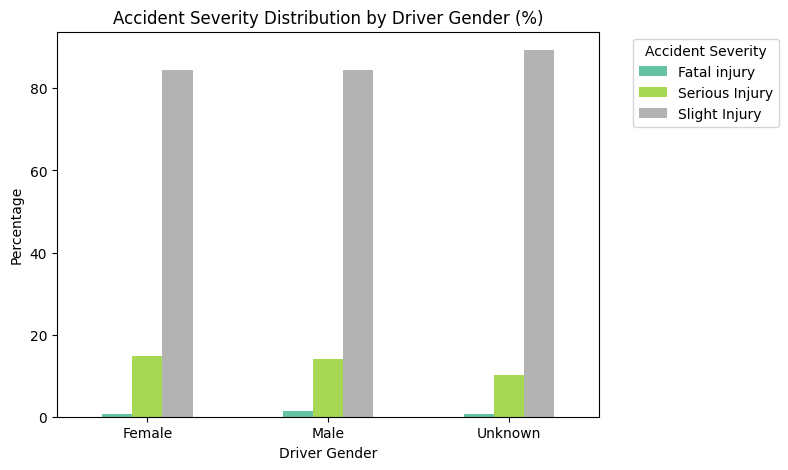

In [75]:
#Is there a difference in accident severity between male and female drivers?

# Crosstab of Accident Severity by Driver Sex
sex_severity = pd.crosstab(df["Sex_of_driver"], df["Accident_severity"], normalize="index") * 100

# Plot grouped bar chart
sex_severity.plot(kind="bar", figsize=(7,5), colormap="Set2")

plt.title("Accident Severity Distribution by Driver Gender (%)")
plt.xlabel("Driver Gender")
plt.ylabel("Percentage")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

In [76]:
sex_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Sex_of_driver,,,
Female,0.713267,14.835949,84.450785
Male,1.329020,14.173297,84.497683
Unknown,0.561798,10.112360,89.325843


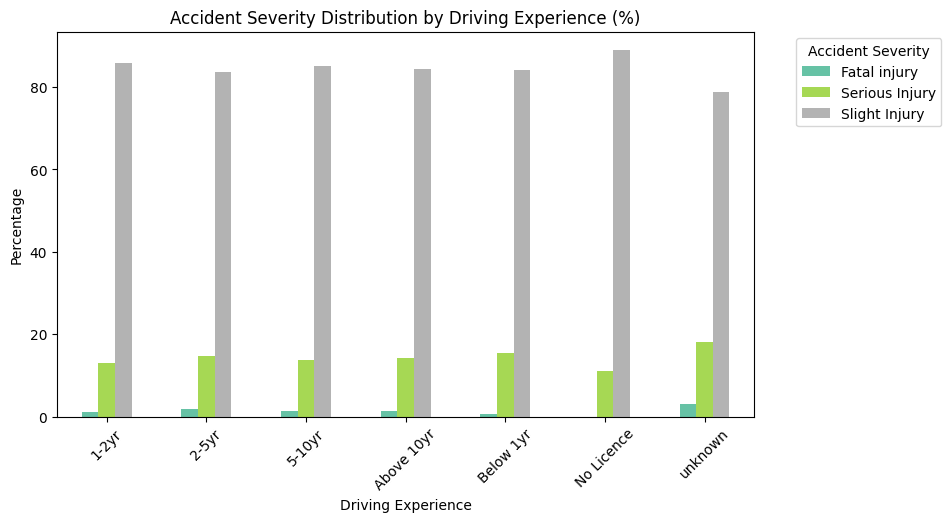

In [78]:
#How does driving experience relate to accident severity (e.g., are new drivers more prone to serious accidents)?

# Crosstab of Accident Severity by Driving Experience
experience_severity = pd.crosstab(df["Driving_experience"], df["Accident_severity"], normalize="index") * 100

# Plot stacked bar chart
experience_severity.plot(kind="bar", figsize=(9,5), colormap="Set2")

plt.title("Accident Severity Distribution by Driving Experience (%)")
plt.xlabel("Driving Experience")
plt.ylabel("Percentage")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [79]:
experience_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Driving_experience,,,
1-2yr,1.195900,12.984055,85.820046
2-5yr,1.760429,14.580941,83.658630
5-10yr,1.219150,13.737734,85.043116
Above 10yr,1.282051,14.279399,84.438550
Below 1yr,0.521610,15.424739,84.053651
No Licence,0.000000,11.016949,88.983051
unknown,3.030303,18.181818,78.787879


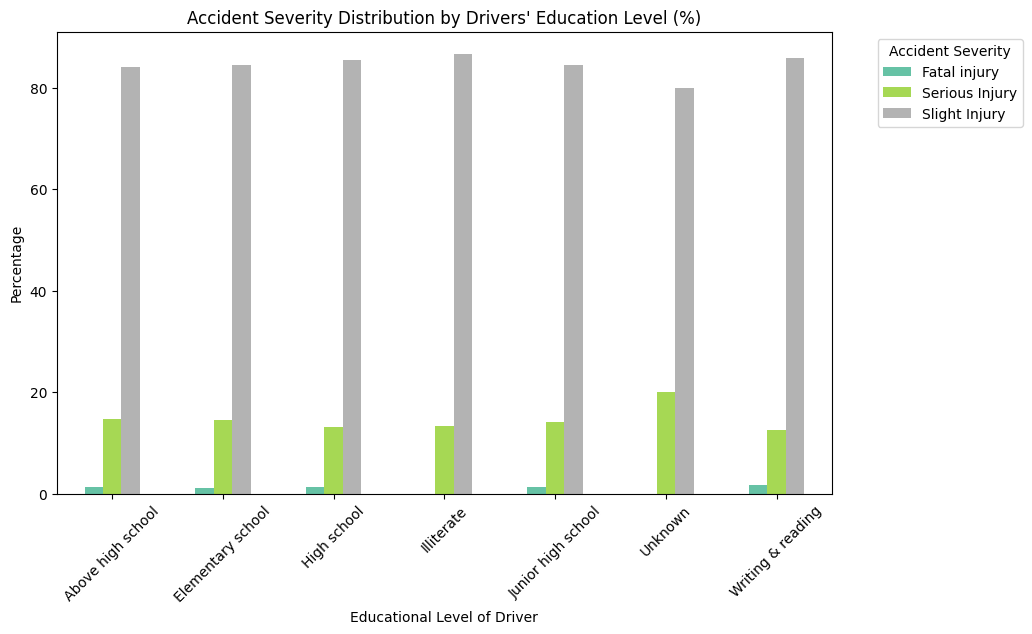

In [81]:
#Does the education level of drivers have any relationship with accident severity?

# Crosstab of Accident Severity by Educational Level
edu_severity = pd.crosstab(df["Educational_level"], df["Accident_severity"], normalize="index") * 100

# Plot stacked bar chart
edu_severity.plot(kind="bar", stacked=False, figsize=(10,6), colormap="Set2")

plt.title("Accident Severity Distribution by Drivers' Education Level (%)")
plt.xlabel("Educational Level of Driver")
plt.ylabel("Percentage")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [82]:
edu_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Educational_level,,,
Above high school,1.381215,14.640884,83.977901
Elementary school,1.109570,14.516875,84.373555
High school,1.351351,13.153153,85.495495
Illiterate,0.000000,13.333333,86.666667
Junior high school,1.273133,14.214464,84.512403
Unknown,0.000000,20.000000,80.000000
Writing & reading,1.704545,12.500000,85.795455


In [83]:
"""Vehicle & Accident Conditions

How often does vehicle defect contribute to accident severity?

Which types of junctions are more likely to have serious/fatal accidents?

How many casualties typically occur per accident, and how does that vary by severity?"""

'Vehicle & Accident Conditions\n\nHow often does vehicle defect contribute to accident severity?\n\nWhich types of junctions are more likely to have serious/fatal accidents?\n\nHow many casualties typically occur per accident, and how does that vary by severity?'

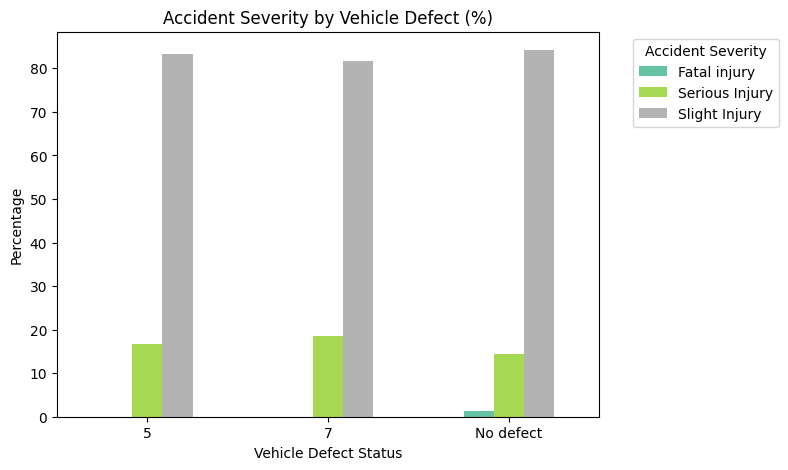

In [95]:
#How often does vehicle defect contribute to accident severity?

# Crosstab: Vehicle Defect vs Accident Severity
defect_severity = pd.crosstab(df["Defect_of_vehicle"], df["Accident_severity"], normalize="index") * 100

# Stacked bar chart
defect_severity.plot(kind="bar",figsize=(7,5), colormap="Set2")
plt.title("Accident Severity by Vehicle Defect (%)")
plt.xlabel("Vehicle Defect Status")
plt.ylabel("Percentage")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()


In [86]:
defect_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Defect_of_vehicle,,,
5,0.000000,16.666667,83.333333
7,0.000000,18.421053,81.578947
No defect,1.350135,14.465732,84.184133
